# 0. CNN(Convolution Neural Network)
- 인간의 시각 처리 방식에서 영감을 얻은 딥러닝 모델 (핵심 내용 : 컨볼루션(convolution) 연산)
    - 기존의 FC layer는 모든 입력 노드를 모든 출력 노드에 연결
    - 하지만, CNN은 입력의 일부분만을 보는 '국소적 연결'을 사용
- 1959~60년 고양이 시각 피질 연구로 두가지 중요한 사실을 확인
    1. 특정 뉴런들이 시야의 특정 부분에만 반응. ex) 어떤 뉴런은 시야의 왼쪽상단에서 반응, 어떤 뉴련은 중앙에서 반응
    2. 뉴런들이 특정 모양이나 방향의 자극에 선택적으로 반응. ex) 어떤 뉴런은 수직선에서 반응, 어떤 뉴런은 수평선에서 반응, 각 원형 등등
    - 이후 인간들도 뇌에서도 유사한 결과가 확인
- 연구결과들은 시각 정보 처리가 전체적으로 이루어지는 것이 아닌, **부분적인 정보들을 조합하여 이루어질수 있음**을 증명
    - 인간의 시각처리 방식을 모방 (CNN의 첫번째 특징)

- CNN의 두번째 특징 = **위치별 특징 추출**
    - 이미지내 요소들(ex. 눈 코 입등)의 위치 정보를 유지하면서 특정 패턴을 찾아내는 능력
    - 이미지의 구조적 특성을 파악하는데 핵심적인 역할
    - 순서 (갓난아이(초기화된 인공 신경망)가 강아지와 고양이를 구별하는 법을 아는 방법)
        1. 처음에는 동물자체가 뭔지도  모르고 눈, 코도 뭔지 모르는 상태에서 학습 시작
        2. 수많은 사진을 보면서 패턴 인식
            - 먼저, 큰 패턴(얼굴, 몸통, 다리)와 같은 전체적인 형태를 인지, 그 다음 작은 패턴(눈, 코 입)의 세부적인 특징을 파악
        3. 이러한 패턴들 사이의 위치 관계를 학습
            - ex) 다리는 몸통에 붙어 있고, 얼굴에 위에서 부터 눈, 코, 입있다는 등 구조적인 패턴을 파악
        4. 전체적인 형태와 구조적 관계를 학습하면서 강아지의 특징과 고양이의 특징을 각각 파악, 차이점 인식
        5. 이러한 과정을 통해 강아지와 고양이를 정확하게 분류
- **컨볼루션 연산은 이런 "위치별 패턴 찾기"를 수행, 따라서 CNN은 "이미지의 픽셀들은 무작위로 존재하는 것이 아닌, 의미 있는 패턴을 이루고 있다"는 중요한 정보를 제공**

---

### 컨볼루션 레이어의 계산 방식은 아실 것이라 생각하고 사진으로 대체합니다.
![ezgif com-animated-gif-maker](https://github.com/user-attachments/assets/f726212f-95f6-4408-9cc4-62da36c38086)
![1_O06nY1U7zoP4vE5AZEnxKA](https://github.com/user-attachments/assets/7238bdaa-65ad-458a-84a7-b16ab8a4362e)


---

# 1. Conv Layer 특징 추출법(one channel, multi channel)

## 1-1 컨볼루션의 특징 추줄법 - One Chnnel

![Screenshot from 2025-03-07 11-12-24.png](<attachment:Screenshot from 2025-03-07 11-12-24.png>)
- 왼쪽 부분의 픽셀 값이 1, 오른쪽이 2로 구성된 이미지 준비
    - 왼쪽보다 오른쪽이 상대적으로 밝아 가운데에 뚜렷한 세로 특징 발생
- 이 이미지에 필터를 적용하여 컨볼루션을 수행
    - 컨볼루션 과정은 필터를 이미지 왼쪽 상단부터 시작하여 한 칸씩 이동하면서 각 위치에서 필터와 곱하고 합
    - **마치 나와 비슷한 패턴을 가진 부분이 어디있나?라는 것을 찾아 다니며 전체를 탐색**
- 이러한 컨볼루션 연산의 핵심인 **곱하고 더하고는 수학적으로 벡터의 내적과 동일**
    - 내적은 두 벡터의 유사성을 측정하는 방법 중하나
    - 따라서, 사실상 이미지의 각 부분과 필터 사이의 유사도를 위치별로 측정하는 것과 동일
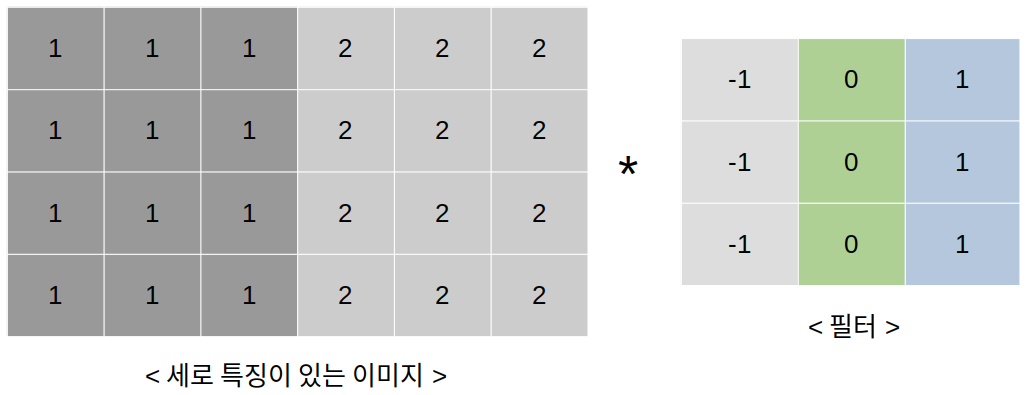

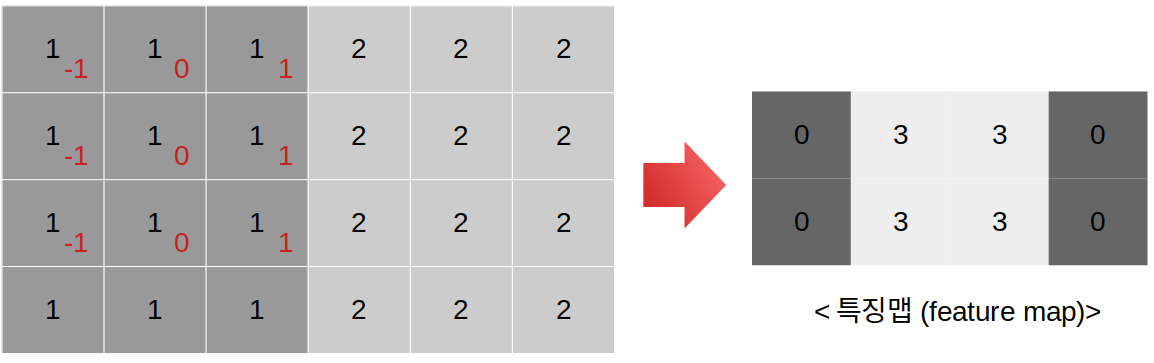
- 왼쪽 위에서 부터 커널 곱하고 더하고 바이어스 더하고 activation(ReLU로 가정) 적용
    - 이 과정을 반복하면 위의 그리과 같은 feature map 획득
    - 이렇게 얻은 결과는 **원본이미지에 어떤 특징이 어디에, 얼마나 강하게 존재하는가?**를 부여줌
        - 즉, 가운데가 3이고 외곽이 3이니까, **가운데에 세로 특징이 3만큼 강하게 존재한다.**

<right><img src = './image/Screenshot from 2025-03-07 11-42-28.png' width='50%' height='50%'></right>
- 필터 2를 적용한 결과는 모든 값이 0
    - **가로특징은 어디에도 없다**

- 앞에서 본 것처럼 여러 종류의 필터(가로, 세로, 대각선 등)를 사용하여 이미지의 다양한 특징을 포착 = feature map
- 위와 같은 과정을 CNN은 이미지에서 **어떤 특징을 추출해야 분류(및 이미지 관련 문제들)를 잘 수행할 수 있을지를 AI 스스로 학습을 통해 알아내가는 것**
    - 각 필터의 **웨이트 행렬이 어떤 형태여야 할지를 AI가 결정**
    - 필터는 자신이 가진 패턴이 이미지 어디에 있는지를 확인
        - 이때, 필터가 가지는 weight가 학습 파라미터 이고 이를 학습. 즉, **어떤 특징을 추출해야한지 학습을 통해 결정**

## 1-2 컨볼루션 특징 추출법 - multi channel

<right><img src = './image/Screenshot from 2025-03-07 14-01-32.png' width='40%' height='40%'></right>
<left><img src = './image/Screenshot from 2025-03-07 14-08-54.png' width='40%' height='40%'></left>

- 규칙을 하나만 기억
    - **필터의 채널 수를 입력이미지의 채널 수와 동일하게 생성**
        - 예를들어, 3채널 이미지에 대해 컨볼루션을 수행할때는 필터의 채널 수도 3으로
        - shape = 채널수 * 행 수 * 열 수
            - 행과 열은 하이퍼 파라미터로써 사람이 결정
            - 채널수는 입력 이미지의 채널을 그대로 물려받아 사용(3)
            - 위 예시를 pytorch코드로 nn.Conv2d(3, 1, (3, 3))
- 연산 자체는 위와 동일
    - 왼쪽 상단에 위치시킨후, 내적을 계산 바이어스를 더하고 활성화 함수를 통과시펴 하나의 feature map을 생성
- 아래 이미지의 채널 shape = 필터 갯수 x 채널수 x 행 x 열
    - pytorch code = nn.Conv2D(3, 2, (3, 3))

![Screenshot from 2025-03-07 14-16-36.png](<attachment:Screenshot from 2025-03-07 14-16-36.png>)
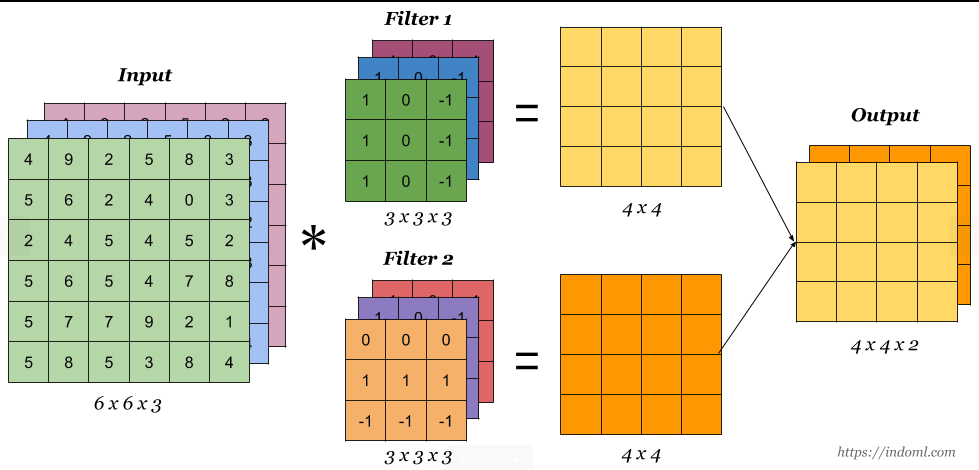

# 2. Skip connection

## 2-1. ReLU
- Sigmoid 함수의 한계를 국복하여 기울기 소실(vanishing gradient)문제를 완화하고자 제안
- 입력값은 양수일때 그대로 출력, 하지만 음수일 때는 0을 출력

- 이점
    - 활성화 함수의 미분값이 1 또는 0이 되어, 입력층으로 갈수록 gradient가 '점점 작아지는' 현상을 효과적으로 막을 수 있게된다.
- 의문점
    - 양수일때는 미분이 1, 음수일 때는 미분이 0 이라면, 단 하나라도 0이 포함되면 전체가 0이 되니까 기울기 소실에 더 약한것 아닌가?

- 딥러닝은 역전파 과정에서 편미분값을 구할때, 해당 파라미터로 전달되는 모든 경로를 고려하여 미분하고 그 값을 더해준다.
- 따라서, 일부 경로가 차단되는 것은 피할 수 없지만, 살아있는 경로를 통해서는 gradient를 온전히 전달 가능
- sigmoid는 이미 너무 작아진 상태에서 더해봐야 의미 없음

## 2-2. Batch Normalization(배치 정규화)
- Batch에 대한 평균과 표준편차를 이용해 정규화를 수행하는 방식
- 각 데이터의 batch마다 loss값도 다르고 위치되는 분포도 다를것이기에 배치별로 정규화를 시켜 최종적으로 0~1사이로 만드는 기법

### 정리 : ReLU와 Batch Normalization 모두 vanishing gradient를 완화하는 문제

## 2-3. Skip-connection
- 앞선 ReLU와 Batch Norm을 함께 사용하면 기울기 소실 문제를 효과적으로 막을 수 있어, 깊은 신경망의 학습이 수월해질 것으로 예상
- 그러나 **기울기 소실문제는 해결되었음에도 불구하고 모델이 깊어질수록 훈련 데이터와 테스트 데이터 모두에 대한 성능이 오히려 떨어지는 과소적합 발생**
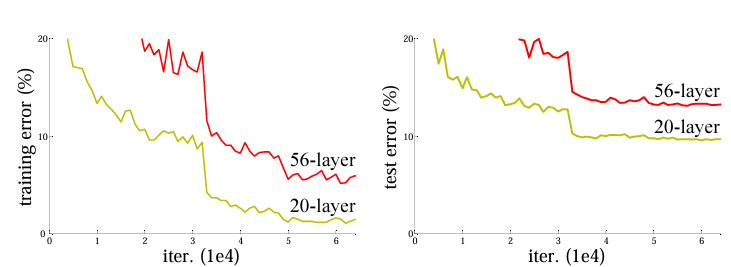

- 기울기 소실 문제가 효과적으로 해결되었음을 확인
    - 크래디언트의 크기는 충분하기 때문에 파라미터 업데이트에는 문제가 없었다는 뜻
    - 이러한 문제는 더 깊은 모델일수록 심한 현상 발생
- 다양한 연구가 진행되었으며, 확인결과 **고차원 모델일수록 Loss함수의 모양이 복잡해서 학습이 어려워진다는 사실**을 확인
https://www.telesens.co/loss-landscape-viz/viewer.html 
- 이를 해결하기 위해 skip connection을 도입

# 4. 1x1 conv의 의미
- 왜 차원을 줄일때 사용할수 있을까?
- 공간을 유지하기위해 사용되는 conv의 컨셉과는 다르게 좁은 공간 영역만 보는 것이므로 의미가 없어 보일수 있다.
- 하지만 1x1 conv는 다른 conv와는 다르게 **특징 맵 간의 가중합(Weighted Sum)**이라는 새로운 관점으로 해석


### 4.1 가정
- 입력 채널이 3, 1x1 conv 사용
- 앞에 말했던것처럼 필터의 채널갯수도 3
- 결국 (1x3x1x1)의 shape을 갖는 filter가 생김 이를 conv진행

<img src = '/home/jsbae/study/docs/image/Screenshot from 2025-03-07 22-32-17.png' width = '50%'>

- 연산 과정은 위그림과 같으며, 3개의 웨이트를 사용, 각 픽셀의 위치에서 w1, w2, w3를 각각 더하고 곱
- 위 과정을 한칸씩 이동하면서 반복하면 하나의 feature map을 얻게됨   
<img src = '/home/jsbae/study/docs/image/Screenshot from 2025-03-07 22-46-00.png' width = '50%'>

- 위 과정을 자세히 보면 각 입력 특징맴에 고정된 웨이트가 곱해짐. 따라서 픽셀단위 연산이 필요없고 통째로 곱하고 더하는것으로 동일한 결과
    - 특징맵을 F1, F2, F3라 한다면, w1F1 + w2F2 + w3F3 로 표현
    - 이는 여러 특징 맵을 가중합을 통해 조합하여 새로운 특징맵을 생성
    - 즉. **1x1 컨볼루션은 마치 요리사가 레시피를 조정하듯, 입력된 특징들중 어떤 것은 많이 넣고, 어떤 것은 적게 넣어 새로운 특징맵을 만들어 내는 과정**
    - 이 말은, **3채널의 입력값중 출력에 좋은 영향을 끼치는 입력 값을 중점적으로 가져가겠다는 의미**
    - 즉, **AI가 학습을 통해 어떤 특징을 얼마나 강조하고 어떤 특징을 얼마나 약화시킬지 결정**
    - 하여 1x1 conv의 결과는 나를 즉, output을 가장 잘 표현하고 있는 특징 맵이기 때문에 이미지 사이즈를 줄여도 타격이 없음
        - maxpooling의 단점은 출력에 중요할만한 픽셀들도 값이 작다는 이유로 0이됨

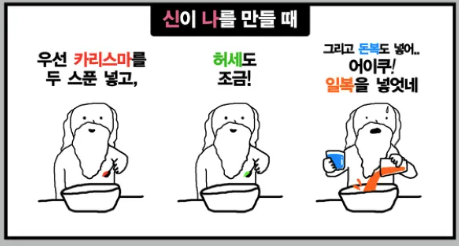

- 1x1 conv layer가 이해가 안간다면 아래의 위 이미지를 확인
    - 위의 이미지에서 카리스마, 허세, 일복이 특징맴
    - 두스푼, 조금, 어이쿠!!가 가중치
    - 이렇게 만들어진 무언가는 나의 성격이됨
    - 학습은 두스푼을 세스푼으로 조금을 더 조금으로 어이쿠를 아...망...으로 조절하는것이 학습
    - 학습후 출력은 내 성격

- 만약, 필터가 10개면? 10x3x1x1 이면, w1F1 + w2F2 + w3F3의 조합을 10개 만드는 것
    - 즉, 10명의 신이 각자의 레시피로 특징맵을 조합 -> 10개의 서로다른 특징맵을 만드는 것

#### 정리 : 1x1 conv는 특징맵을 만들때, 가장 출력에 잘 맞는 특징맵을 생성해내기 때문에 효과적으로 변형 및 채널수를 조절 가능해짐. 그렇기 때문에 동시에 모델의 복잡도와 연사량을 조절할 수 있어 성능 향상과 계산 효율성 개선에 기여